In [1]:
%matplotlib notebook
import lalsimulation,lal
import matplotlib.pyplot as plt
import numpy as np
import subprocess

In [2]:
# Define binary parameters
nqcCoeffsInput=lal.CreateREAL8Vector(10) ##This will be unused, but it is necessary
m1 = 50.0*lal.MSUN_SI
m2 = 50.0*lal.MSUN_SI
phi_c = 0.
f_start22 = 8. #Frequency of the 22 mode at which the signal starts
distance = 500.0*lal.PC_SI
spin1_z = 0.
spin2_z =  0.
deltaT = 1./16384.

In [3]:
# Define QNM deviation parameters
domega220 = 0.
dtau220 = 0.

In [4]:
# Generate waveform
sphtseries, dyn, dynHi = lalsimulation.SimIMRSpinAlignedEOBModes(deltaT, m1, m2, f_start22, distance, spin1_z, spin2_z,41, 0., 0., 0.,0.,0.,0.,0.,0.,1.,1., domega220, dtau220, 0., 0., 0., 0., 0., 0., 0., 0., nqcCoeffsInput, 0)

# Read the modes
hlm = {}

##55 mode
modeL = sphtseries.l
modeM = sphtseries.m
print 'Loading mode', modeL, modeM
h55 = sphtseries.mode.data.data #This is h_55
hlm[(modeL, modeM)] = h55

##44 mode
modeL = sphtseries.next.l
modeM = sphtseries.next.m
print 'Loading mode', modeL, modeM
h44 = sphtseries.next.mode.data.data #This is h_44
hlm[(modeL, modeM)] = h44

##21 mode
modeL = sphtseries.next.next.l
modeM = sphtseries.next.next.m
print 'Loading mode', modeL, modeM
h21 = sphtseries.next.next.mode.data.data #This is h_21
hlm[(modeL, modeM)] = h21

##33 mode
modeL = sphtseries.next.next.next.l
modeM = sphtseries.next.next.next.m
print 'Loading mode', modeL, modeM
h33 = sphtseries.next.next.next.mode.data.data #This is h_33
hlm[(modeL, modeM)] = h33

##22 mode
modeL = sphtseries.next.next.next.next.l
modeM = sphtseries.next.next.next.next.m
print 'Loading mode', modeL, modeM
h22 = sphtseries.next.next.next.next.mode.data.data #This is h_22
hlm[(modeL, modeM)] = h22

##time array (s)
time_array = np.arange(0,len(h22)*deltaT,deltaT)
        
# Generate the full waveform
paramdict = lal.CreateDict()
lalsimulation.SimInspiralWaveformParamsInsertDOmega220(paramdict, domega220)
lalsimulation.SimInspiralWaveformParamsInsertDTau220(paramdict, dtau220)

inclination = 0.
hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, inclination, phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)
h = hp.data.data - 1j*hc.data.data    

Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2


<IPython.core.display.Javascript object>


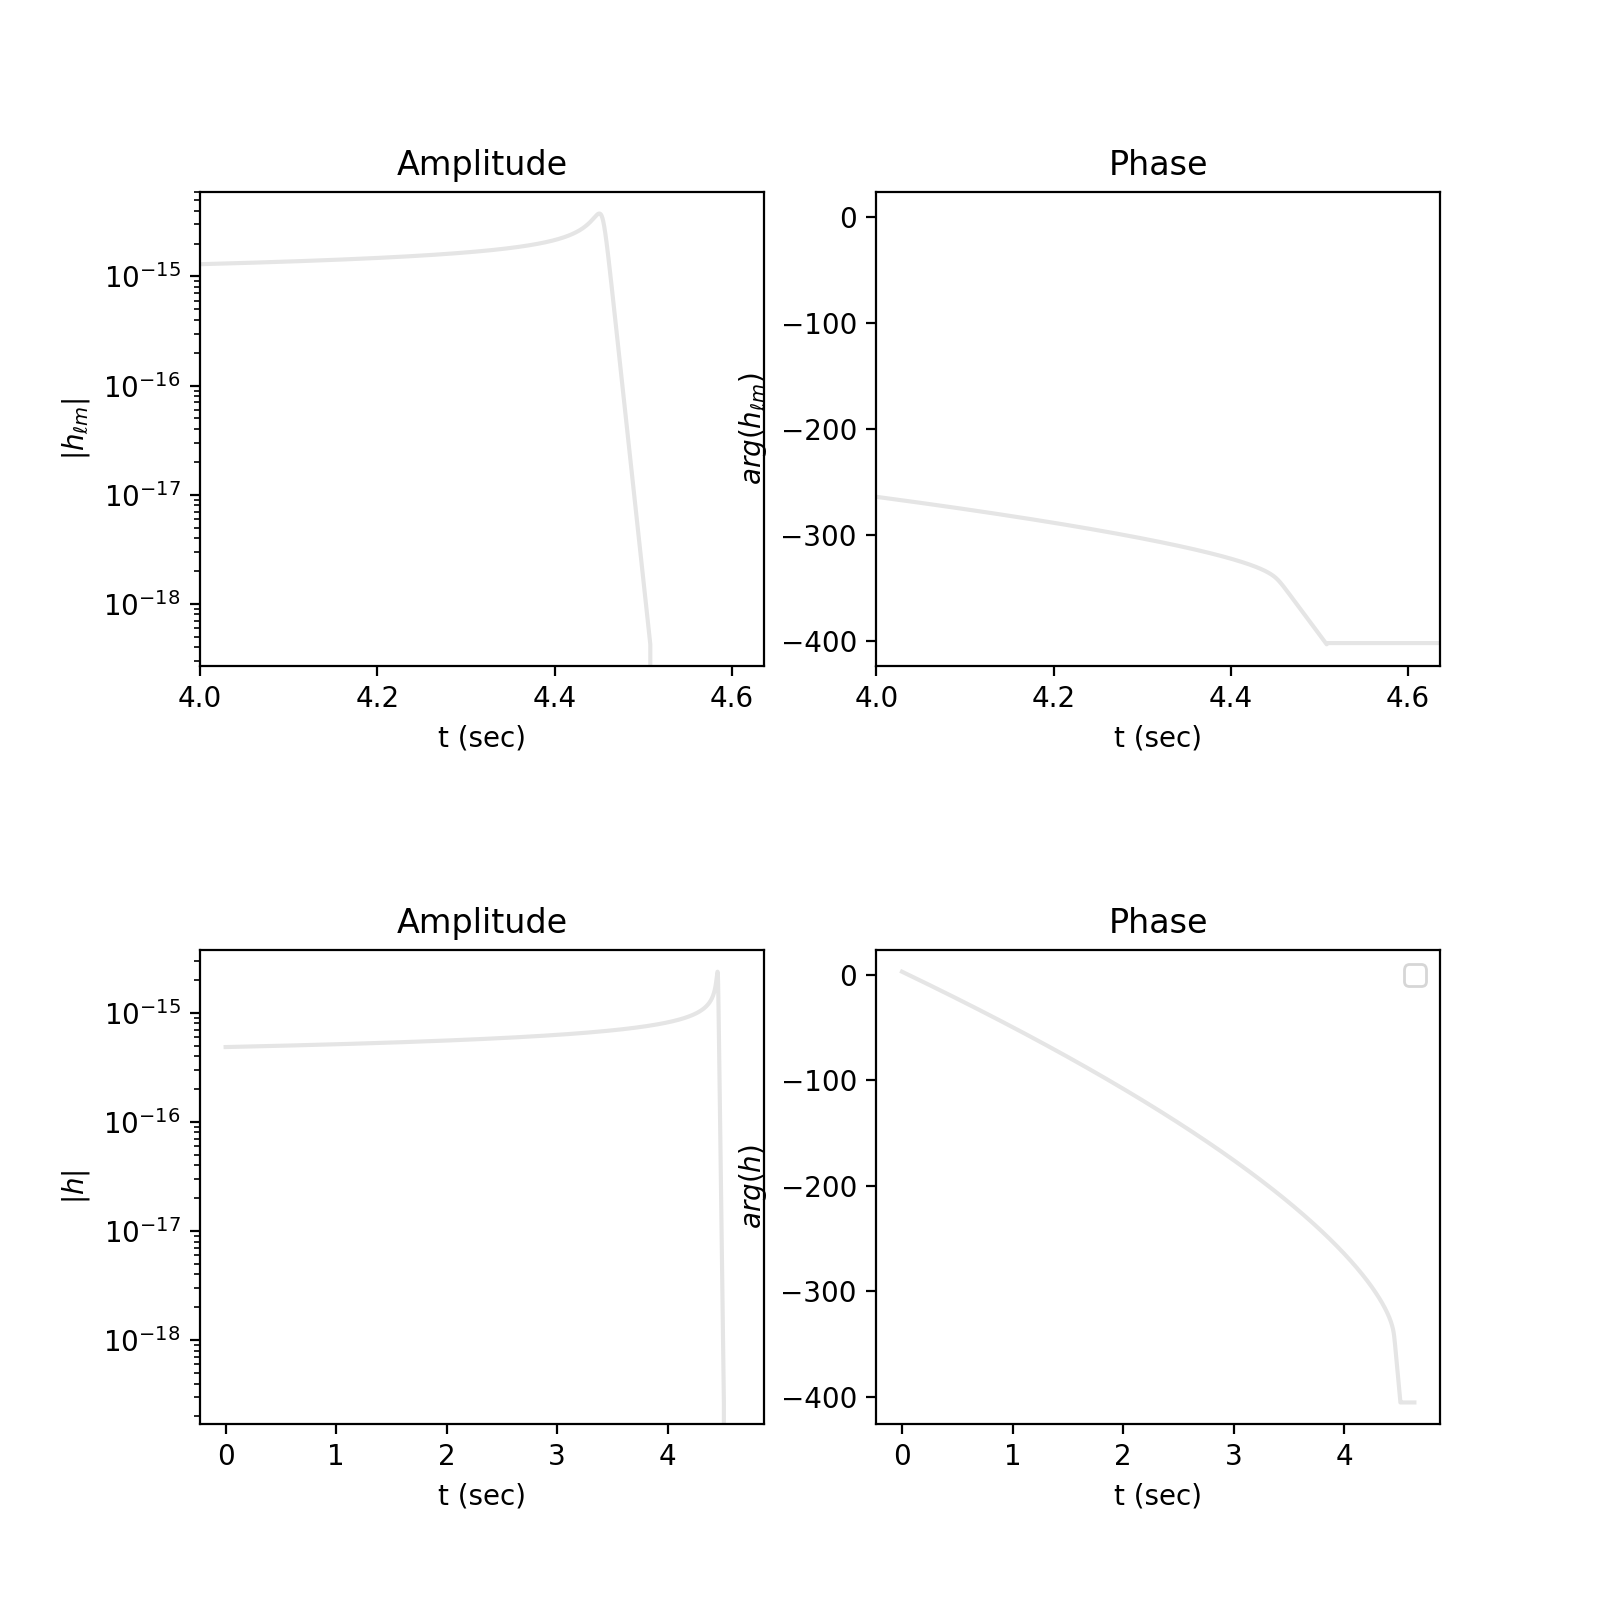

/Users/abhirupghosh/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Library/Python/2.7/site-packages/matplotlib/__init__.py:910: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Library/Python/2.7/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/Users/abhirupghosh/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


In [5]:
# Plotting amplitude and phase of the single modes
plt.figure(figsize=(8,8))

plt.subplot(221)
plt.semilogy(time_array,np.abs(h22), color='k', alpha=0.1)
plt.xlabel('t (sec)')
plt.ylabel('$|h_{\ell m}|$')
plt.title('Amplitude')
#plt.legend()
plt.xlim([4, time_array[-1]])
plt.subplot(222)
plt.plot(time_array,np.unwrap(np.angle(h22)), color='k', alpha=0.1)
plt.xlabel('t (sec)')
plt.ylabel('$arg(h_{\ell m})$')
plt.title('Phase')
plt.xlabel('t (sec)')
plt.subplots_adjust(hspace=0.4)
plt.xlim([4, time_array[-1]])
plt.hold(True)

# Plot the waveform
plt.subplot(223)
plt.semilogy(time_array, np.abs(h), color='k', alpha=0.1)
plt.xlabel('t (sec)')
plt.ylabel('$|h|$')
plt.title('Amplitude')
#plt.xlim([4, time_array[-1]])
plt.subplot(224)
plt.plot(time_array,np.unwrap(np.angle(h)), color='k', alpha=0.1)
plt.xlabel('t (sec)')
plt.ylabel('$arg(h)$')
plt.title('Phase') 
plt.xlabel('t (sec)')  
#plt.xlim([4, time_array[-1]])
plt.legend()
plt.subplots_adjust(hspace=0.6)
plt.hold(True)
        
plt.show()    